In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [2]:
#Read Data
data = pd.read_csv('D:\\LoanTap\LoanTap\\artifacts\\data_ingestion\\LoanTap.csv')

In [3]:
#Check first 5 rows in data
data.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [4]:
##Check Shape Of data
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 210142
Number of columns: 27


In [5]:
#check name of columns
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [6]:
#check distribution of output class labels
data['loan_status'].value_counts(normalize = True)*100

loan_status
Fully Paid     80.457883
Charged Off    19.542117
Name: proportion, dtype: float64

In [7]:
#statistical Summary of dataset
data.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  210142.000000  210142.000000  210142.000000  2.101420e+05   
mean    14094.437095      13.636186     431.279867  7.430756e+04   
std      8351.639881       4.461733     250.613065  6.029851e+04   
min       500.000000       5.320000      16.250000  2.500000e+03   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.120000  6.400000e+04   
75%     20000.000000      16.490000     567.040000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  7.446395e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  210141.000000  210141.000000  210141.000000  2.101410e+05   
mean       17.322776      11.306323       0.178870  1.581339e+04   
std         8.131926       5.137542       0.514899  2.047085e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.260000       8.000000       0.000000  6.014000e+03   
50%        16.880000      10.000000       0.000000  1.116500e+04   
75%        22.950000      14.000000       0.000000  1.960600e+04   
max       189.900000      90.000000      40.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  209993.000000  210141.000000  190001.000000         209852.000000  
mean       53.757455      25.423030       1.814043              0.122272  
std        24.510515      11.898087       2.146586              0.356548  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              7.000000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210142 entries, 0 to 210141
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             210142 non-null  float64
 1   term                  210142 non-null  object 
 2   int_rate              210142 non-null  float64
 3   installment           210142 non-null  float64
 4   grade                 210142 non-null  object 
 5   sub_grade             210142 non-null  object 
 6   emp_title             198020 non-null  object 
 7   emp_length            200425 non-null  object 
 8   home_ownership        210142 non-null  object 
 9   annual_inc            210142 non-null  float64
 10  verification_status   210142 non-null  object 
 11  issue_d               210141 non-null  object 
 12  loan_status           210141 non-null  object 
 13  purpose               210141 non-null  object 
 14  title                 209213 non-null  object 
 15  

<Axes: >

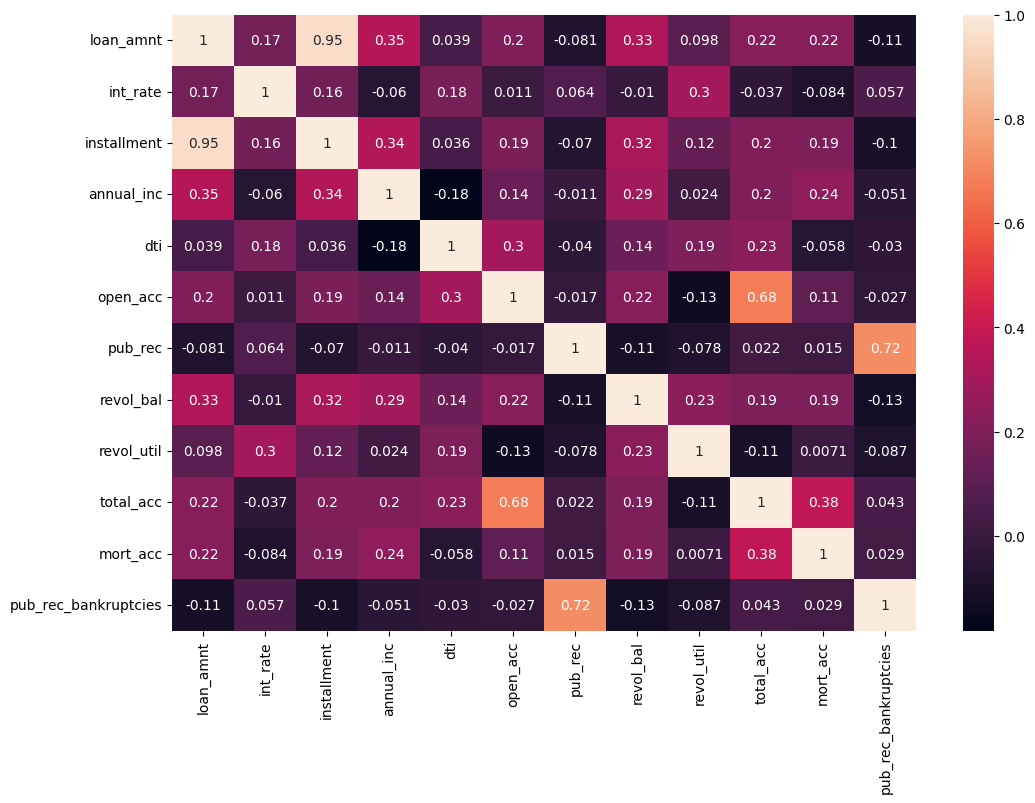

In [9]:
# plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data=data.loc[:, data.dtypes!=object].corr(method='pearson'),annot=True)

We noticed almost perfect correlation (0.95) between "loan_amnt" the "installment" feature.

installment: The monthly payment owed by the borrower if the loan originates.


loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
So, we can drop either one of those columns.

In [10]:
#drop installment column
data.drop(columns=['installment'],axis=1,inplace=True)

#### Exploratory Data Analysis

In [11]:
## Loan Status: Fully Paid vs charged off
data.groupby(by ='loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   41066.0  15115.066600  8477.988431  1000.0  8650.0  14000.0   
Fully Paid   169075.0  13846.534822  8301.793599   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19200.0  40000.0

In [12]:
## term and loan status
data.groupby(by ='term')['loan_status'].value_counts(normalize = True)*100

term       loan_status
36 months  Fully Paid     84.290009
           Charged Off    15.709991
60 months  Fully Paid     68.129001
           Charged Off    31.870999
Name: proportion, dtype: float64

% of people taking loan for 3 years and repaying full amt is very high 

In [13]:
data['home_ownership'].value_counts(normalize=True)*100

home_ownership
MORTGAGE    50.127057
RENT        40.383645
OWN          9.455035
OTHER        0.024745
NONE         0.008566
ANY          0.000952
Name: proportion, dtype: float64

In [14]:
## lets merge home ownership status of NONE and ANY with OTHER
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

home_ownership
MORTGAGE    105338
RENT         84863
OWN          19869
OTHER           72
Name: count, dtype: int64

In [15]:
#### home ownership status
data.groupby(by='home_ownership')['loan_status'].value_counts(normalize=True)*100

home_ownership  loan_status
MORTGAGE        Fully Paid     83.106601
                Charged Off    16.893399
OTHER           Fully Paid     77.777778
                Charged Off    22.222222
OWN             Fully Paid     79.339675
                Charged Off    20.660325
RENT            Fully Paid     77.434218
                Charged Off    22.565782
Name: proportion, dtype: float64

Majority of people have registered their home ownership status as Mortgage and Rent

Only 10 pct people own the house

In [16]:
## converting string to datetime
data['issue_d']=pd.to_datetime(data['issue_d'])
data['earliest_cr_line']=pd.to_datetime(data['earliest_cr_line'])

C:\Users\Sail\AppData\Local\Temp\ipykernel_44104\3942143584.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d']=pd.to_datetime(data['issue_d'])
C:\Users\Sail\AppData\Local\Temp\ipykernel_44104\3942143584.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line']=pd.to_datetime(data['earliest_cr_line'])


In [17]:
# separating numerical and categorical columns

In [18]:
#separate categorical columns
cat_columns = data.loc[:, data.dtypes==object].columns
cat_columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [19]:
#print unique vlaues in each column
for col in cat_columns:
    print(f'{col}: {data[col].unique()}')

term: [' 36 months' ' 60 months']
grade: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
sub_grade: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
emp_title: ['Marketing' 'Credit analyst ' 'Statistician' ... 'City of janesville'
 'Harrys Famous Flowers' 'IMR']
emp_length: ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'OTHER']
verification_status: ['Not Verified' 'Source Verified' 'Verified' 'Not Ver']
loan_status: ['Fully Paid' 'Charged Off' nan]
purpose: ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy' nan]
title: ['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Consolidate Debt and Pay Taxes' 'Discover HSBC' '

In [20]:
data[['purpose', 'title']]

purpose                    title
0                 vacation                 Vacation
1       debt_consolidation       Debt consolidation
2              credit_card  Credit card refinancing
3              credit_card  Credit card refinancing
4              credit_card    Credit Card Refinance
...                    ...                      ...
210137            vacation                   Africa
210138  debt_consolidation        paid credict card
210139  debt_consolidation       Debt consolidation
210140      small_business                 Business
210141                 NaN                      NaN

[210142 rows x 2 columns]

In [21]:
data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy', nan], dtype=object)

In [22]:
len(data['title'].unique())

28435

Title and Purpose have similar values hence we can drop any one column

I am dropping title column as there are many categories and looks like they are manually entered and there are many human error present in this column

In [23]:
#drop installment column
data.drop(columns=['title'],axis=1,inplace=True)

In [24]:
data['emp_title']=data.emp_title.str.lower()

In [25]:
len(data['emp_title'].unique())

90700

In [26]:
data['emp_title']=data.emp_title.str.strip()

In [27]:
len(data['emp_title'].unique())

88069

In [28]:
### application type
data.groupby(by='application_type')['loan_status'].value_counts()

application_type  loan_status
DIRECT_PAY        Fully Paid         86
                  Charged Off        51
INDIVIDUAL        Fully Paid     168817
                  Charged Off     40987
JOINT             Fully Paid        172
                  Charged Off        28
Name: count, dtype: int64

most of the loan applications are individual application

In [29]:
data.groupby(by='grade')['loan_status'].value_counts(normalize=True)*100

grade  loan_status
A      Fully Paid     93.741151
       Charged Off     6.258849
B      Fully Paid     87.493308
       Charged Off    12.506692
C      Fully Paid     78.850771
       Charged Off    21.149229
D      Fully Paid     71.162818
       Charged Off    28.837182
E      Fully Paid     62.849478
       Charged Off    37.150522
F      Fully Paid     57.491459
       Charged Off    42.508541
G      Fully Paid     53.700190
       Charged Off    46.299810
Name: proportion, dtype: float64

<Axes: xlabel='sub_grade', ylabel='count'>

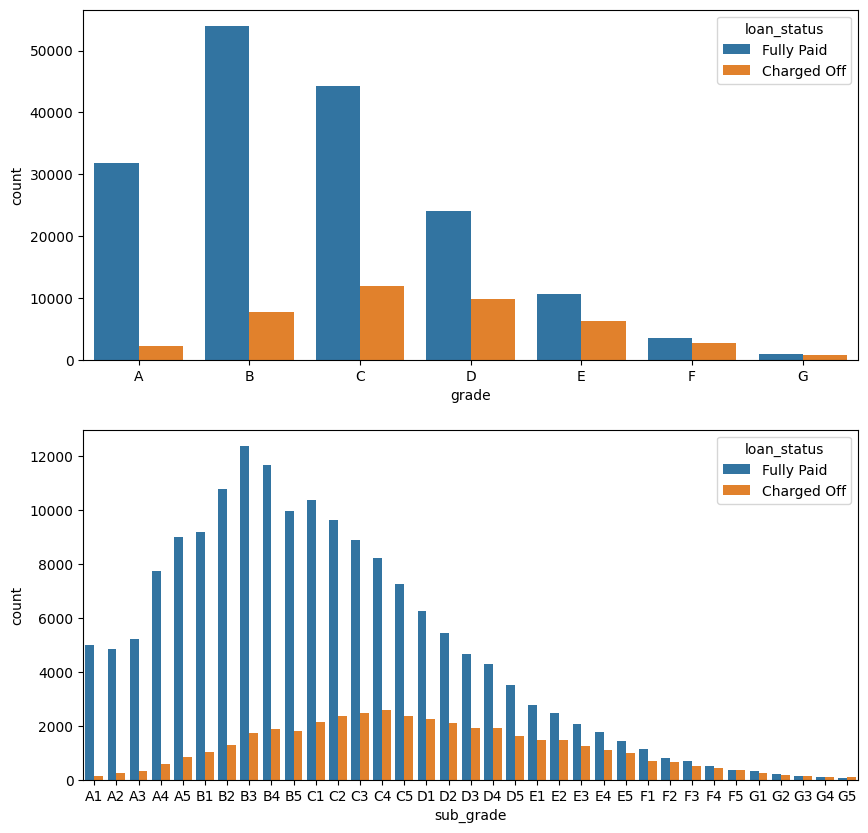

In [30]:
## Grade and sub grade wise distribution
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.countplot(x='grade', data=data, hue='loan_status', order=sorted(data['grade'].unique()))

plt.subplot(2,1,2)
sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sorted(data['sub_grade'].unique()))

The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan. 

C:\Users\Sail\AppData\Local\Temp\ipykernel_44104\4254363207.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

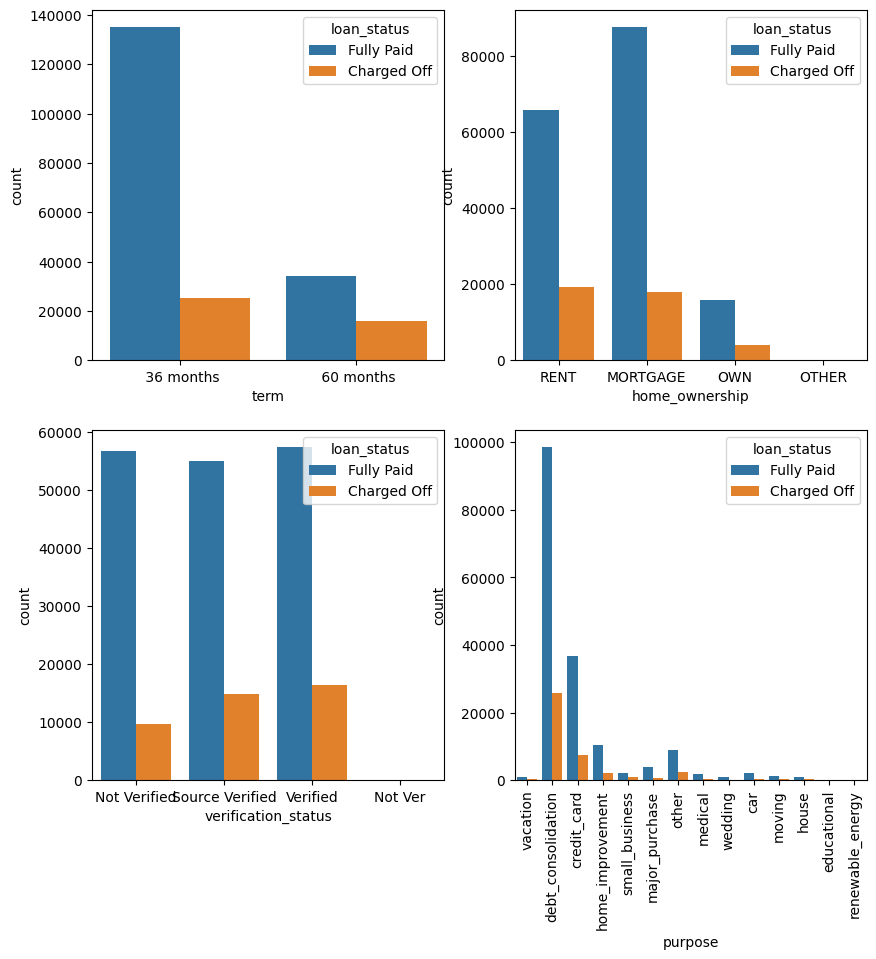

In [31]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.countplot(x='term',data=data,hue='loan_status')

plt.subplot(2,2,2)
sns.countplot(x='home_ownership',data=data,hue='loan_status')

plt.subplot(2,2,3)
sns.countplot(x='verification_status',data=data,hue='loan_status')

plt.subplot(2,2,4)
g=sns.countplot(x='purpose',data=data,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

Majority of people are applying for tenure of 3 years

Most of the people are applying for purpose of debt_consolidation

C:\Users\Sail\AppData\Local\Temp\ipykernel_44104\3356241054.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


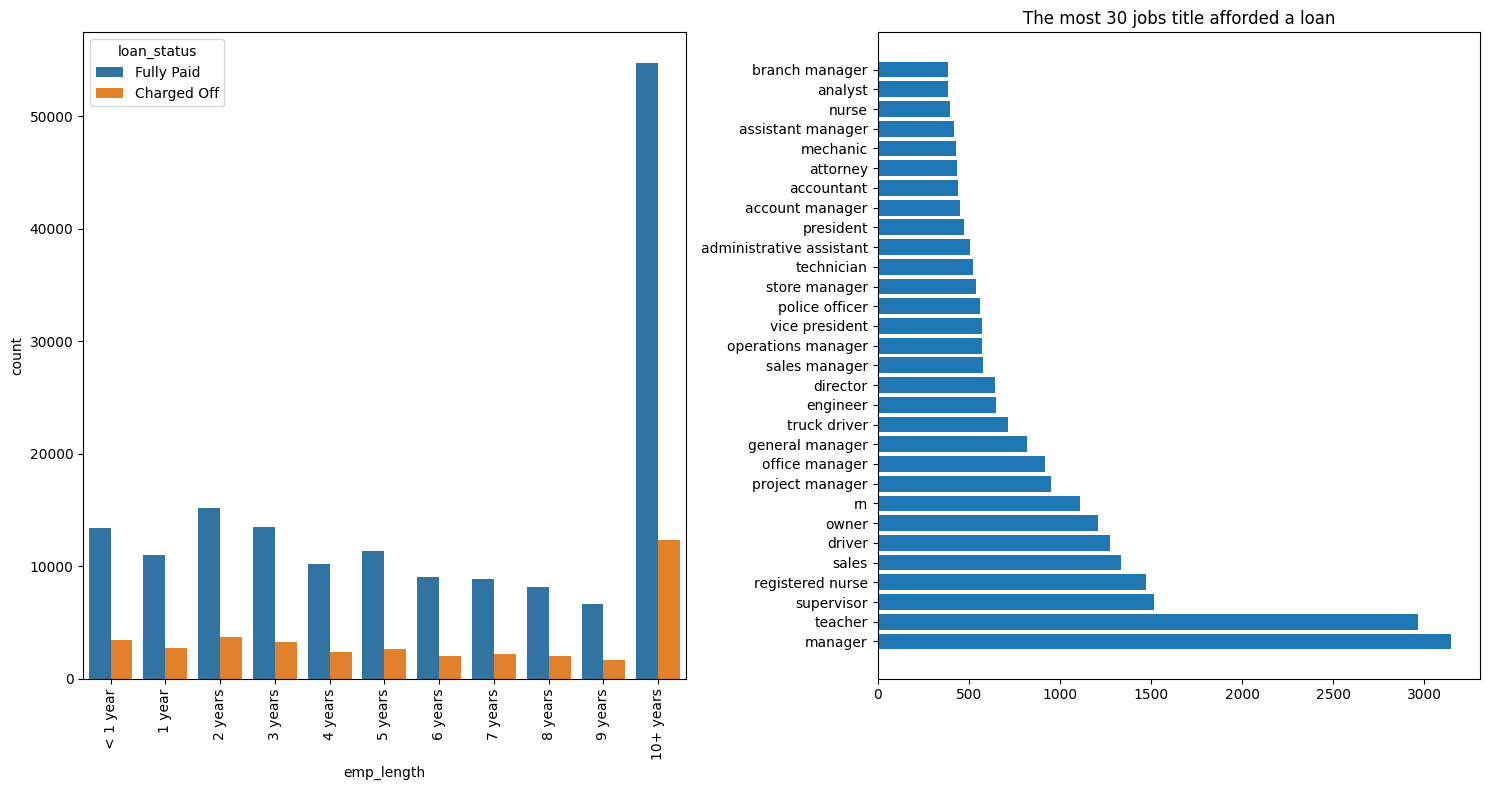

In [32]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=data,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.barh(data.emp_title.value_counts()[:30].index,data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [33]:
num_columns = data.loc[:, data.dtypes==np.number].columns
num_columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

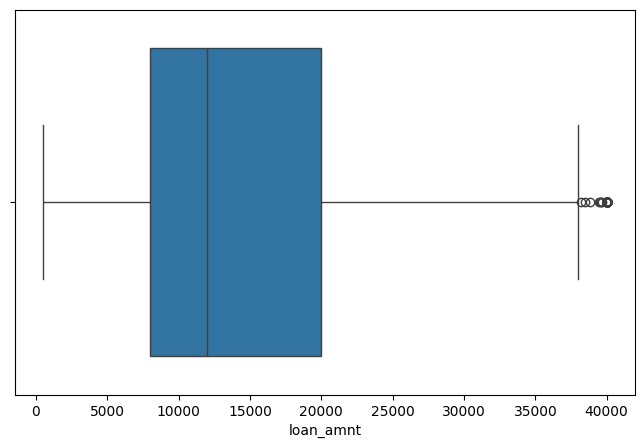

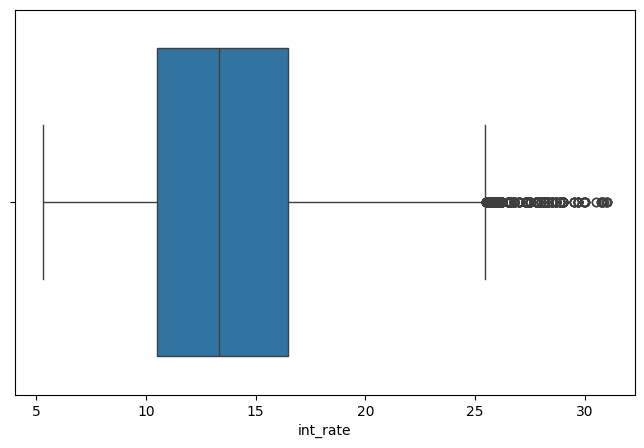

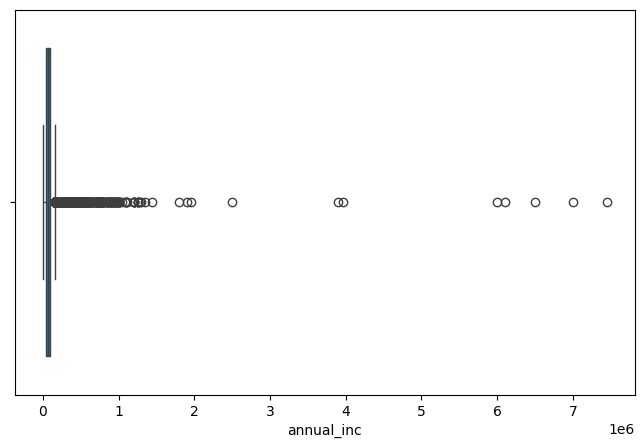

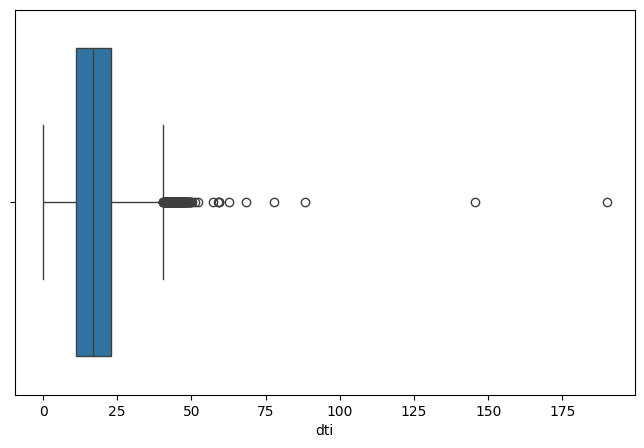

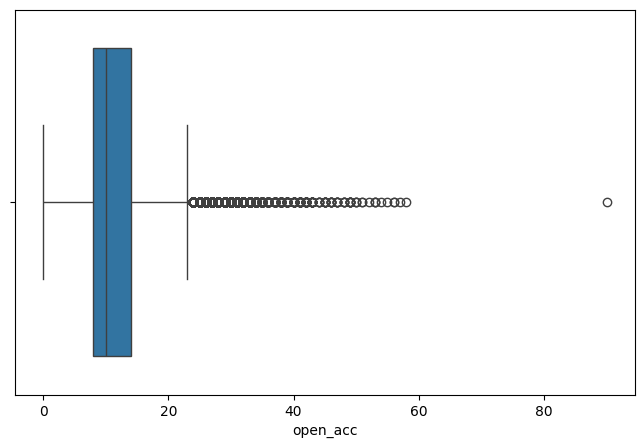

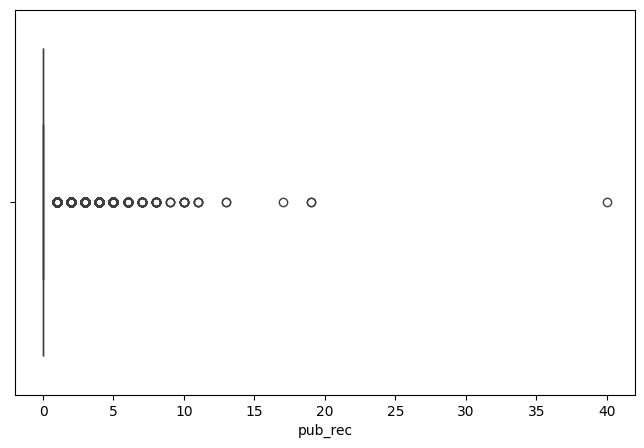

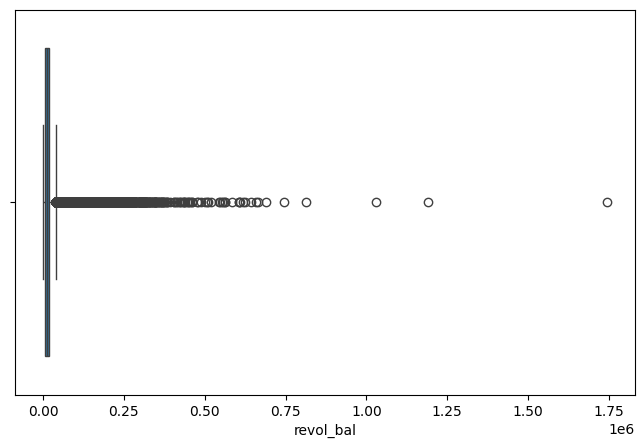

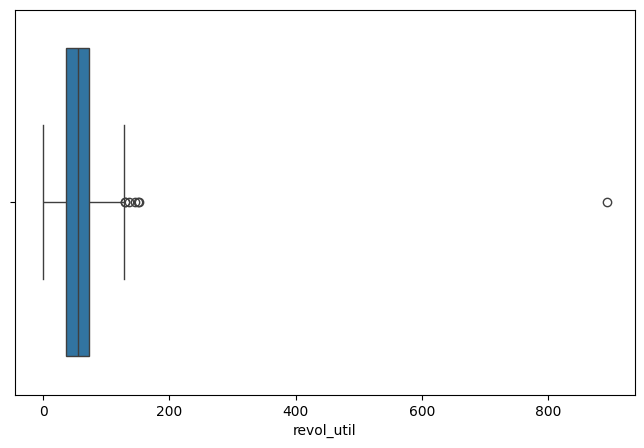

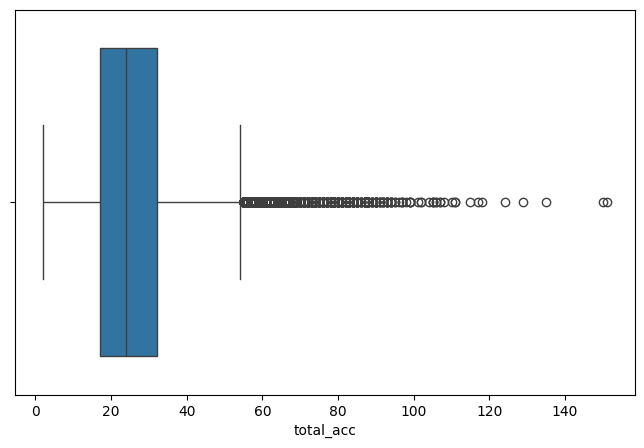

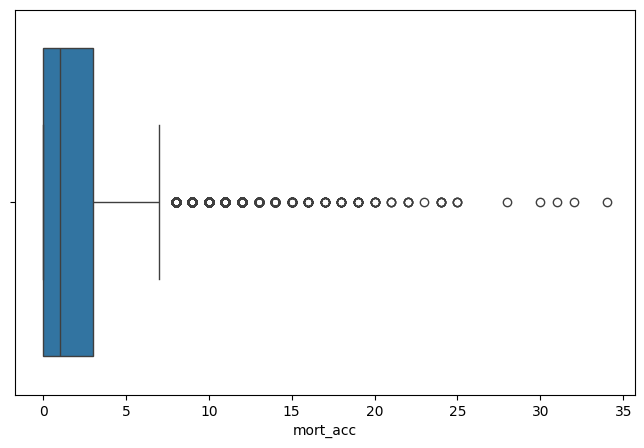

In [34]:
for col in num_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=data[col])
    plt.show()

#### Feature Engineering

#below are high outlier columns. We dont want to delete these records since someone whos taken a loan for the first time may have low bankruptucy record

#so im just flagging anything more than 0 as 1

#pub_acc, mort_acc, pub_rec_bankruptcies

In [35]:
#below are high outlier columns. We dont want to delete these records since someone whos taken a loan for the first time may have low bankruptucy record
#so im just flagging anything more than 0 as 1
# pub_acc, mort_acc, pub_rec_bankruptcies

def flag(number):
    if number==0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


In [36]:
data['pub_rec']=data.pub_rec.apply(flag)
data['mort_acc']=data.mort_acc.apply(flag)
data['pub_rec_bankruptcies']=data.pub_rec_bankruptcies.apply(flag)

In [37]:
# Mapping of target variable 
data['loan_status']=data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [38]:
##Missing values treatment

In [39]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.768480
emp_length              4.624016
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000476
loan_status             0.000476
purpose                 0.000476
dti                     0.000476
earliest_cr_line        0.000476
open_acc                0.000476
pub_rec                 0.000476
revol_bal               0.000476
revol_util              0.070904
total_acc               0.000476
initial_list_status     0.000476
application_type        0.000476
mort_acc                9.584471
pub_rec_bankruptcies    0.138002
address                 0.000476
dtype: float64

Feature mort_acc has almost 10 pct of missing values and hence we can not drop it hence we will fill this missing values usning  Mean Target Imputaion

In [40]:
data['mort_acc'] = data['mort_acc'].fillna(data.groupby('total_acc')['mort_acc'].transform('mean'))

In [41]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.768480
emp_length              4.624016
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000476
loan_status             0.000476
purpose                 0.000476
dti                     0.000476
earliest_cr_line        0.000476
open_acc                0.000476
pub_rec                 0.000476
revol_bal               0.000476
revol_util              0.070904
total_acc               0.000476
initial_list_status     0.000476
application_type        0.000476
mort_acc                0.000476
pub_rec_bankruptcies    0.138002
address                 0.000476
dtype: float64

In [42]:
data.shape

(210142, 25)

In [43]:
# Dropping rows with null values
data.dropna(inplace=True)

In [44]:
# Remaining no. of rows
data.shape

(197507, 25)

In [45]:
#outlier treatment
for col in num_columns:
    mean=data[col].mean()
    std=data[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    data=data[(data[col]<upper_limit) & (data[col]>lower_limit)]
    
data.shape

(188823, 25)

In [46]:
## Data Preprocessing
term_values={' 36 months': 36, ' 60 months':60}
data['term'] = data.term.map(term_values)

In [47]:
# Initial List Status
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [48]:
list_status = {'w': 0, 'f': 1}
data['initial_list_status'] = data.initial_list_status.map(list_status)

In [49]:
#fetch ZIP from address and then drop the remaining details
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [50]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '7 years', '8 years', '5 years', '1 year'],
      dtype=object)

In [51]:
emp_length_map = {'10+ years':10, '4 years':4, '< 1 year':0, '6 years':6, '9 years':9,
       '2 years':2, '3 years':3, '7 years':7, '8 years':8, '5 years':5, '1 year':1}
data['emp_length'] = data.emp_length.map(emp_length_map)

In [52]:
len(data['emp_title'].unique())

85098

In [53]:
#drop emp_title column as it is difficult to encode these many categories
# Dropping some variables which we can let go for now 
data.drop(columns=['issue_d', 'emp_title', 'sub_grade',
                   'address', 'earliest_cr_line'], 
                   axis=1, inplace=True)

In [54]:
#separate categorical columns
cat_columns = data.loc[:, data.dtypes==object].columns
cat_columns

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'application_type', 'zip_code'],
      dtype='object')

In [55]:
data=pd.get_dummies(data,columns=cat_columns,drop_first=True,dtype=)

In [56]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

data.head()

loan_amnt  term  int_rate  emp_length  annual_inc  loan_status    dti  \
0    10000.0    36     11.44          10    117000.0          0.0  26.24   
1     8000.0    36     11.99           4     65000.0          0.0  22.05   
2    15600.0    36     10.49           0     43057.0          0.0  12.79   
3     7200.0    36      6.49           6     54000.0          0.0   2.60   
4    24375.0    60     17.27           9     55000.0          1.0  33.95   

   open_acc  pub_rec  revol_bal  revol_util  total_acc  initial_list_status  \
0      16.0      0.0    36369.0        41.8       25.0                    0   
1      17.0      0.0    20131.0        53.3       27.0                    1   
2      13.0      0.0    11987.0        92.2       26.0                    1   
3       6.0      0.0     5472.0        21.5       13.0                    1   
4      13.0      0.0    24584.0        69.8       43.0                    1   

   mort_acc  pub_rec_bankruptcies  grade_B  grade_C  grade_D  grade_E  \
0       0.0                   0.0     True    False    False    False   
1       1.0                   0.0     True    False    False    False   
2       0.0                   0.0     True    False    False    False   
3       0.0                   0.0    False    False    False    False   
4       1.0                   0.0    False     True    False    False   

   grade_F  grade_G  home_ownership_OTHER  home_ownership_OWN  \
0    False    False                 False               False   
1    False    False                 False               False   
2    False    False                 False               False   
3    False    False                 False               False   
4    False    False                 False               False   

   home_ownership_RENT  verification_status_Source Verified  \
0                 True                                False   
1                False                                False   
2                 True                                 True   
3                 True                                False   
4                False                                False   

   verification_status_Verified  purpose_credit_card  \
0                         False                False   
1                         False                False   
2                         False                 True   
3                         False                 True   
4                          True                 True   

   purpose_debt_consolidation  purpose_educational  purpose_home_improvement  \
0                       False                False                     False   
1                        True                False                     False   
2                       False                False                     False   
3                       False                False                     False   
4                       False                False                     False   

   purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  \
0          False                   False            False           False   
1          False                   False            False           False   
2          False                   False            False           False   
3          False                   False            False           False   
4          False                   False            False           False   

   purpose_other  purpose_renewable_energy  purpose_small_business  \
0          False                     False                   False   
1          False                     False                   False   
2          False                     False                   False   
3          False                     False                   False   
4          False                     False                   False   

   purpose_vacation  purpose_wedding  application_type_INDIVIDUAL  \
0              True            False                         True   
1             False   

In [57]:
data.shape

(188823, 50)

In [58]:
##data preparation for modelling

In [60]:
## Separating features and target
X=data.drop('loan_status',axis=1)
y=data['loan_status']
X.head()

loan_amnt  term  int_rate  emp_length  annual_inc    dti  open_acc  \
0    10000.0    36     11.44          10    117000.0  26.24      16.0   
1     8000.0    36     11.99           4     65000.0  22.05      17.0   
2    15600.0    36     10.49           0     43057.0  12.79      13.0   
3     7200.0    36      6.49           6     54000.0   2.60       6.0   
4    24375.0    60     17.27           9     55000.0  33.95      13.0   

   pub_rec  revol_bal  revol_util  total_acc  initial_list_status  mort_acc  \
0      0.0    36369.0        41.8       25.0                    0       0.0   
1      0.0    20131.0        53.3       27.0                    1       1.0   
2      0.0    11987.0        92.2       26.0                    1       0.0   
3      0.0     5472.0        21.5       13.0                    1       0.0   
4      0.0    24584.0        69.8       43.0                    1       1.0   

   pub_rec_bankruptcies  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0                   0.0     True    False    False    False    False    False   
1                   0.0     True    False    False    False    False    False   
2                   0.0     True    False    False    False    False    False   
3                   0.0    False    False    False    False    False    False   
4                   0.0    False     True    False    False    False    False   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                 False               False                 True   
1                 False               False                False   
2                 False               False                 True   
3                 False               False                 True   
4                 False               False                False   

   verification_status_Source Verified  verification_status_Verified  \
0                                False                         False   
1                                False                         False   
2                                 True                         False   
3                                False                         False   
4                                False                          True   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                False                       False                False   
1                False                        True                False   
2                 True                       False                False   
3                 True                       False                False   
4                 True                       False                False   

   purpose_home_improvement  purpose_house  purpose_major_purchase  \
0                     False          False                   False   
1                     False          False                   False   
2                     False          False                   False   
3                     False          False                   False   
4                     False          False                   False   

   purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  \
0            False           False          False                     False   
1            False           False          False                     False   
2            False           False          False                     False   
3            False           False          False                     False   
4            False           False          False                     False   

   purpose_small_business  purpose_vacation  purpose_wedding  \
0                   False              True            False   
1                   False             False            False   
2                   False             False            False   
3                   False             False            False   
4                   False             False            False   

   application_type_INDIVIDU

In [ ]:
#splitting data into train and test data
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(151058, 49)
(37765, 49)


In [ ]:
# scale data using min max scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# initialising and training model using train data
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# making predictions on test data
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.892


In [ ]:

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[30351   183]
 [ 3878  3353]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

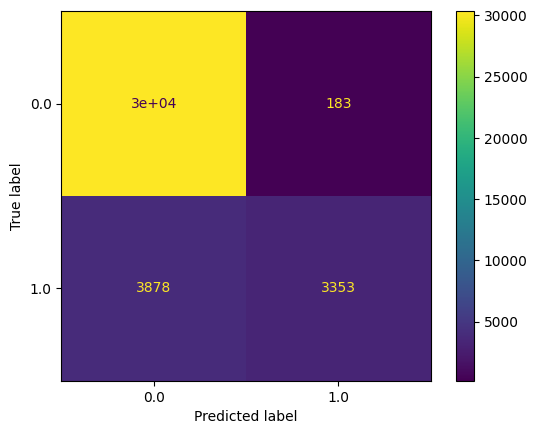

In [ ]:
disp = ConfusionMatrixDisplay(cm,
                           display_labels=logreg.classes_)
disp.plot()

Here our focus should be on minimizing false negative i.e we should increase our recall score in order to minimize number of people whose loan is charged off but getting detected as they have fully paid their loan.

In [ ]:
## lets check classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     30534
         1.0       0.95      0.46      0.62      7231

    accuracy                           0.89     37765
   macro avg       0.92      0.73      0.78     37765
weighted avg       0.90      0.89      0.88     37765



From above report it can be seen that recall for positive class is less than 0.5 i.e. number of FN are freater than number of TP. To improve recall we have to adjust threshold value such that it will increase our TPR. We can use ROC or Precison and recall curves here.

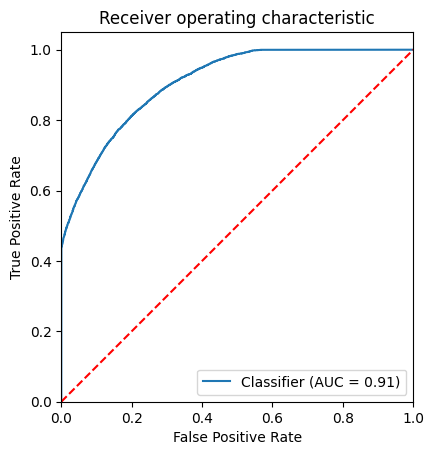

In [ ]:
#Plot ROC curve
RocCurveDisplay.from_predictions(y_test, logreg.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Precision and Recall Curve')

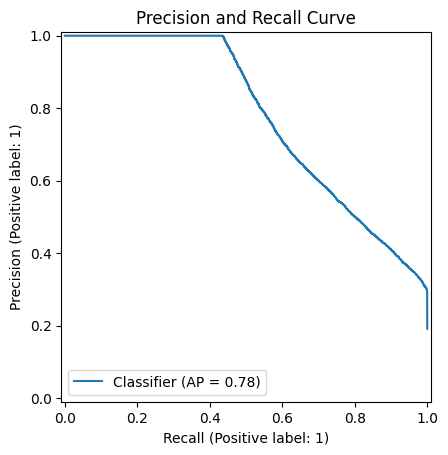

In [ ]:
# As we have class imbalance in dataset and we know that ROC curve doesn't perform well with imbalance dataset 
# we can plot precision recall curve 
PrecisionRecallDisplay.from_predictions(y_test,logreg.predict_proba(X_test)[:,1] )  
plt.title('Precision and Recall Curve')

In [ ]:
# We have got the accuracy of 0.891 but our recall for positive class is less
#Low recall means high number of false negatives i.e. our model is predicting defauletrs as non defaulters
#let's check how we can improve this score further
#Let's check if there is any Multi colinearity present in data, we will VIF to check this
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

VIF_res = calc_vif(X)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
VIF_res

Feature     VIF
38          application_type_INDIVIDUAL  160.08
2                              int_rate  122.43
26           purpose_debt_consolidation   51.21
1                                  term   27.25
25                  purpose_credit_card   18.61
6                              open_acc   13.87
10                            total_acc   12.62
16                              grade_D   11.61
15                              grade_C   10.30
9                            revol_util    9.52
17                              grade_E    9.35
4                            annual_inc    8.33
5                                   dti    8.08
0                             loan_amnt    7.40
28             purpose_home_improvement    5.86
18                              grade_F    5.68
14                              grade_B    5.40
33                        purpose_other    5.39
12                             mort_acc    4.98
7                               pub_rec    4.87
8                             revol_bal    4.79
13                 pub_rec_bankruptcies    4.66
3                            emp_length    3.94
22                  home_ownership_RENT    3.25
30               purpose_major_purchase    2.87
11                  initial_list_status    2.67
24         verification_status_Verified    2.36
46                       zip_code_70466    2.23
44                       zip_code_30723    2.23
42                       zip_code_22690    2.22
45                       zip_code_48052    2.21
23  verification_status_Source Verified    2.19
19                              grade_G    2.13
35               purpose_small_business    2.05
40                       zip_code_05113    2.00
43                       zip_code_29597    2.00
31                      purpose_medical    1.87
32                       purpose_moving    1.60
36                     purpose_vacation    1.52
29                        purpose_house    1.46
37                      purpose_wedding    1.41
21                   home_ownership_OWN    1.30
41                       zip_code_11650    1.26
47                       zip_code_86630    1.25
48                       zip_code_93700    1.25
39               application_type_JOINT    1.13
34             purpose_renewable_energy    1.07
27                  purpose_educational    1.05
20                 home_ownership_OTHER    1.00

In [ ]:
## We will drop columns with high VIF one by one and check VIF score again and again
X.drop(columns=['application_type_INDIVIDUAL'], axis=1, inplace=True)
calc_vif(X)[:5]

Feature     VIF
2                     int_rate  103.60
26  purpose_debt_consolidation   27.79
1                         term   24.27
6                     open_acc   13.73
10                   total_acc   12.62

In [ ]:
X.drop(columns=['int_rate'], axis=1, inplace=True)
calc_vif(X)[:5]

Feature    VIF
1                         term  23.36
25  purpose_debt_consolidation  22.95
5                     open_acc  13.61
9                    total_acc  12.62
8                   revol_util   9.06

In [ ]:
X.drop(columns=['term'], axis=1, inplace=True)
calc_vif(X)[:5]

Feature    VIF
24  purpose_debt_consolidation  19.20
4                     open_acc  13.61
8                    total_acc  12.59
7                   revol_util   9.05
2                   annual_inc   8.06

In [ ]:
X.drop(columns=['purpose_debt_consolidation'], axis=1, inplace=True)
calc_vif(X)[:5]

Feature    VIF
4    open_acc  13.04
8   total_acc  12.58
7  revol_util   8.35
2  annual_inc   7.76
3         dti   7.62

In [ ]:
X.drop(columns=['open_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

Feature   VIF
7   total_acc  8.23
6  revol_util  8.04
2  annual_inc  7.66
3         dti  7.06
0   loan_amnt  6.72

In [ ]:
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.20,stratify=y)

Let's do Oversampling using SMOTE as we have number of samples belonging to positive class are much less than number of samples belonging to negative class

In [ ]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [ ]:
X_train_res.shape

(244272, 44)

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (244272, 44)
After OverSampling, the shape of train_y: (244272,) 

After OverSampling, counts of label '1': 122136
After OverSampling, counts of label '0': 122136


In [ ]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [ ]:
prediction = lr1.predict(X_test)

In [ ]:
lr1.score(X_test, y_test)

0.8004236727128293

[[24370  6164]
 [ 1373  5858]]


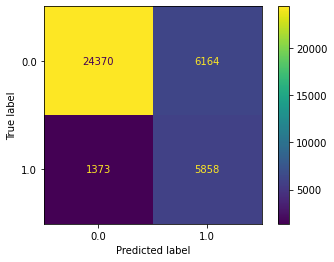

In [ ]:
cm1=confusion_matrix(y_test,prediction)
print(cm1)
disp = ConfusionMatrixDisplay(cm1,
                           display_labels=lr1.classes_)
disp.plot()

In [ ]:
## lets check classification report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87     30534
         1.0       0.49      0.81      0.61      7231

    accuracy                           0.80     37765
   macro avg       0.72      0.80      0.74     37765
weighted avg       0.86      0.80      0.82     37765



In [ ]:
PrecisionRecallDisplay.from_predictions(y_test,lr1.predict_proba(X_test)[:,1] )  
plt.title('Precision and Recall Curve')

Text(0.5, 1.0, 'Precision and Recall Curve')

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test,lr1.predict_proba(X_test)[:,1],)

In [ ]:
df= pd.DataFrame({'Threshold':threshold, 'Precision':precision[:-1], 'Recall':recall[:-1]})
df.sort_values(by=['Threshold'], ascending=False)

Threshold  Precision    Recall
24365   0.999918   1.000000  0.000138
24364   0.999916   1.000000  0.000277
24363   0.999907   1.000000  0.000415
24362   0.999903   1.000000  0.000553
24361   0.999900   1.000000  0.000691
24360   0.999893   1.000000  0.000830
24359   0.999892   1.000000  0.000968
24358   0.999892   1.000000  0.001106
24357   0.999890   1.000000  0.001245
24356   0.999888   1.000000  0.001383
24355   0.999888   1.000000  0.001521
24354   0.999885   1.000000  0.001660
24353   0.999881   1.000000  0.001798
24352   0.999881   1.000000  0.001936
24351   0.999881   1.000000  0.002074
24350   0.999881   1.000000  0.002213
24349   0.999880   1.000000  0.002351
24348   0.999879   1.000000  0.002489
24347   0.999878   1.000000  0.002628
24346   0.999878   1.000000  0.002766
24345   0.999875   1.000000  0.002904
24344   0.999873   1.000000  0.003042
24343   0.999873   1.000000  0.003181
24342   0.999873   1.000000  0.003319
24341   0.999872   1.000000  0.003457
24340   0.999872   1.000000  0.003596
24339   0.999872   1.000000  0.003734
24338   0.999871   1.000000  0.003872
24337   0.999870   1.000000  0.004011
24336   0.999869   1.000000  0.004149
24335   0.999869   1.000000  0.004287
24334   0.999869   1.000000  0.004425
24333   0.999869   1.000000  0.004564
24332   0.999868   1.000000  0.004702
24331   0.999868   1.000000  0.004840
24330   0.999866   1.000000  0.004979
24329   0.999865   1.000000  0.005117
24328   0.999865   1.000000  0.005255
24327   0.999864   1.000000  0.005393
24326   0.999864   1.000000  0.005532
24325   0.999864   1.000000  0.005670
24324   0.999864   1.000000  0.005808
24323   0.999864   1.000000  0.005947
24322   0.999864   1.000000  0.006085
24321   0.999863   1.000000  0.006223
24320   0.999863   1.000000  0.006361
24319   0.999862   1.000000  0.006500
24318   0.999861   1.000000  0.006638
24317   0.999861   1.000000  0.006776
24316   0.999859   1.000000  0.006915
24315   0.999858   1.000000  0.007053
24314   0.999858   1.000000  0.007191
24313   0.999858   1.000000  0.007330
24312   0.999858   1.000000  0.007468
24311   0.999857   1.000000  0.007606
24310   0.999857   1.000000  0.007744
24309   0.999857   1.000000  0.007883
24308   0.999857   1.000000  0.008021
24307   0.999856   1.000000  0.008159
24306   0.999856   1.000000  0.008298
24305   0.999856   1.000000  0.008436
24304   0.999855   1.000000  0.008574
24303   0.999855   1.000000  0.008712
24302   0.999855   1.000000  0.008851
24301   0.999855   1.000000  0.008989
24300   0.999854   1.000000  0.009127
24299   0.999854   1.000000  0.009266
24298   0.999854   1.000000  0.009404
24297   0.999853   1.000000  0.009542
24296   0.999853   1.000000  0.009681
24295   0.999853   1.000000  0.009819
24294   0.999852   1.000000  0.009957
24293   0.999852   1.000000  0.010095
24292   0.999852   1.000000  0.010234
24291   0.999852   1.000000  0.010372
24290   0.999851   1.000000  0.010510
24289   0.999851   1.000000  0.010649
24288   0.999851   1.000000  0.010787
24287   0.999851   1.000000  0.010925
24286   0.999851   1.000000  0.011063
24285   0.999850   1.000000  0.011202
24284   0.999850   1.000000  0.011340
24283   0.999850   1.000000  0.011478
24282   0.999849   1.000000  0.011617
24281   0.999848   1.000000  0.011755
24280   0.999848   1.000000  0.011893
24279   0.999847   1.000000  0.012032
24278   0.999846   1.000000  0.012170
24277   0.999846   1.000000  0.012308
24276   0.999845   1.000000  0.012446
24275   0.999845   1.000000  0.012585
24274   0.999845   1.000000  0.012723
24273   0.999845   1.000000  0.012861
24272   0.999844   1.000000  0.013000
24271   0.999844   1.000000  0.013138
24270   0.999844   1.000000  0.013276
24269   0.999844   1.000000  0.013414
24268   0.999844   1.000000  0.013553
24267   0.999844   1.000000  0.013691
24266   0.999844   1.000000  0.013829
24265   0.999843   1.000000  0.013968
24264   0.999843   1.000000  0.014106
24263   0.999842   1.000000  0.014244
24262   0.999842   1.000000  0.014383
24261   0.999842 

From classification matrix we can conclude that, we have increased the recall by decreasing the number of false negatives (person who is not repaying full amount but getting detected as non defaulter) but in this process our precision has dropped down to less than 0.5 i.e model is detecting more people as defaulters even if they have returned full loan amout and this could impact the business as they can not give loan to defaulters. We can minimize this loss by increasing probability threshold for +ve class to 0.7 but this will cause small decrease in recall value.

We can also use different classification models to improve precision, recall and accuracy.


In [ ]:
feature_imp = pd.DataFrame({'Features':X.columns,"importance":abs(lr1.coef_.reshape(-1))})

In [ ]:
feature_imp.sort_values(by='importance', ascending = False)[:5].Features.tolist()

['zip_code_93700',
 'zip_code_11650',
 'zip_code_86630',
 'zip_code_48052',
 'zip_code_70466']